In [1]:
import os
import sys
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="1";


%load_ext autoreload
%autoreload 2
from CW import CW
from FGSM import FGSM
from OPT_attack import OPT_attack
from OPT_attack_polar import OPT_attack_polar
from OPT_attack_polar_GD import OPT_attack_polar_GD
from OPT_attack_lsq import OPT_attack_lsq
from OPT_attack_polar_lsq import OPT_attack_polar_lsq
from OPT_attack_GD import OPT_attack_GD
from OPT_genattack import OPT_genattack
from OPT_attack_sign_SGD import OPT_attack_sign_SGD
from ZOO import ZOO
from OPT_attack_lf import OPT_attack_lf
from nes_attack import NES
from models import PytorchModel
import torch
from allmodels import MNIST, load_model, load_mnist_data, load_cifar10_data, CIFAR10
import os
import numpy as np
import matplotlib.pyplot as plt

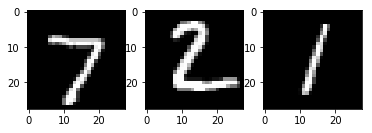

In [2]:
net = MNIST()
net.cuda()
net = torch.nn.DataParallel(net, device_ids=[0])
# print(net)
load_model(net,'mnist_gpu.pt')
net.eval()
model = net.module if torch.cuda.is_available() else net
# model = model.cpu()
train_loader, test_loader, train_dataset, test_dataset = load_mnist_data()

X0, Y0 = None, None
X1, Y1 = None, None
X2, Y2 = None, None
for i, (xi,yi) in enumerate(test_loader):
    if i==0:
        X0, Y0 = xi, yi
    if i==1:
        X1, Y1 = xi, yi
    if i==2:
        X2, Y2 = xi, yi
        
amodel = PytorchModel(model, bounds=[0,1], num_classes=10)

def plot_adv(X, adv):
    plt.subplot(1,2,1)
    plt.imshow(X[0][0], cmap='gray')
    plt.subplot(1,2,2)
    plt.imshow(adv.cpu()[0][0], cmap='gray')
    plt.show()

# Plot the sample images
plt.subplot(1,3,1)
plt.imshow(X0[0][0], cmap='gray')
plt.subplot(1,3,2)
plt.imshow(X1[0][0], cmap='gray')
plt.subplot(1,3,3)
plt.imshow(X2[0][0], cmap='gray')
plt.show()

In [3]:
x, y = X0, Y0
seed = 100
target = 6

### UNTARGETED

Searching for the initial direction on 100 random directions: 
--------> Found distortion 9.3453
--------> Found distortion 8.6148
--------> Found distortion 8.4811
--------> Found distortion 7.9500
--------> Found distortion 7.8894
--------> Found distortion 7.8894
--------> Found distortion 7.3928
==========> Found best distortion 7.3928 in 1.5011 seconds using 335 queries
Iteration  10 distortion 4.7173 num_queries 2197
Iteration  20 distortion 3.6718 num_queries 4354
Iteration  30 distortion 3.1542 num_queries 6459
Iteration  40 distortion 2.8548 num_queries 8369
Iteration  50 distortion 2.6466 num_queries 10290
Iteration  60 distortion 2.4382 num_queries 12229
Iteration  70 distortion 2.3046 num_queries 14202
Iteration  80 distortion 2.2142 num_queries 16131
Iteration  90 distortion 2.1566 num_queries 18027
Iteration 100 distortion 2.0995 num_queries 19970
Iteration 110 distortion 2.0310 num_queries 21851
Iteration 120 distortion 1.9734 num_queries 23701
Iteration 130 distortion 1

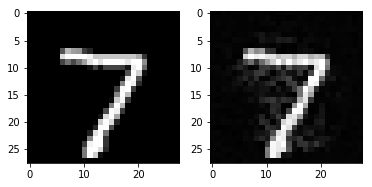

In [5]:
attack = OPT_attack(amodel)
adv, dist = attack(x.cuda(), y.cuda(), seed=seed, query_limit=150000)
plot_adv(x, adv)

Searching for the initial direction on 100 random directions: 
--------> Found distortion 9.3453
--------> Found distortion 8.6148
--------> Found distortion 8.4811
--------> Found distortion 7.9500
--------> Found distortion 7.8894
--------> Found distortion 7.8894
--------> Found distortion 7.3928
==========> Found best distortion 7.3928 in 1.6089 seconds using 335 queries
    Time elapsed 4.172325134277344e-05 for iteration 0
Iteration   1 distortion 5.3621 num_queries 699
    Time elapsed 2.36085844039917 for iteration 1
    Time elapsed 4.283811092376709 for iteration 2
    Time elapsed 6.481133937835693 for iteration 3
    Time elapsed 8.65625786781311 for iteration 4
    Time elapsed 10.899339437484741 for iteration 5
Iteration   6 distortion 2.3507 num_queries 2099
    Time elapsed 13.011932611465454 for iteration 6
    Time elapsed 15.36128854751587 for iteration 7
    Time elapsed 17.162819147109985 for iteration 8
    Time elapsed 18.959683418273926 for iteration 9
    Time 

Success: stopping threshold reached
    Time elapsed 188.69324731826782 for iteration 102
Success: stopping threshold reached
    Time elapsed 190.50280261039734 for iteration 103
Success: stopping threshold reached
    Time elapsed 192.43628001213074 for iteration 104
Success: stopping threshold reached
    Time elapsed 194.20600533485413 for iteration 105
Iteration 106 distortion 1.4339 num_queries 25982
Success: stopping threshold reached
    Time elapsed 196.02191734313965 for iteration 106
Success: stopping threshold reached
    Time elapsed 197.74726009368896 for iteration 107
Success: stopping threshold reached
    Time elapsed 199.49423146247864 for iteration 108
Success: stopping threshold reached
    Time elapsed 200.79938173294067 for iteration 109
Success: stopping threshold reached
    Time elapsed 202.09491968154907 for iteration 110
Iteration 111 distortion 1.4336 num_queries 27136
Success: stopping threshold reached
    Time elapsed 203.4956934452057 for iteration 111
S

Success: stopping threshold reached
    Time elapsed 341.48000836372375 for iteration 185
Iteration 186 distortion 1.4314 num_queries 45364
Success: stopping threshold reached
    Time elapsed 343.4401695728302 for iteration 186
Success: stopping threshold reached
    Time elapsed 345.4553418159485 for iteration 187
Success: stopping threshold reached
    Time elapsed 347.3234384059906 for iteration 188
Success: stopping threshold reached
    Time elapsed 349.28837037086487 for iteration 189
Success: stopping threshold reached
    Time elapsed 351.1509165763855 for iteration 190
Iteration 191 distortion 1.4313 num_queries 46580
Success: stopping threshold reached
    Time elapsed 353.11328530311584 for iteration 191
Success: stopping threshold reached
    Time elapsed 355.0194516181946 for iteration 192
Success: stopping threshold reached
    Time elapsed 356.85833644866943 for iteration 193
Success: stopping threshold reached
    Time elapsed 358.8599638938904 for iteration 194
Succes

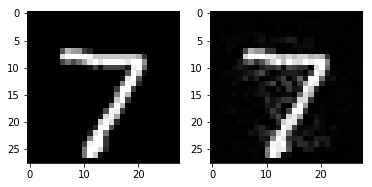

In [6]:
attack = OPT_attack_sign_SGD(amodel)
adv_sign, dist_sign = attack(x.cuda(), y.cuda(), seed=seed, query_limit=60000)
plot_adv(x, adv_sign)

Running gradient descent with start learning rate  1.0
Searching for the initial direction on 100 random directions: 
--------> Found distortion 9.3453
--------> Found distortion 8.6148
--------> Found distortion 8.4811
--------> Found distortion 7.9500
--------> Found distortion 7.8894
--------> Found distortion 7.8894
--------> Found distortion 7.3928
==========> Found best distortion 7.3928 in 1.6069 seconds using 335 queries
Iteration   1 distortion 5.3816 num_queries 662
Iteration   6 distortion 3.0521 num_queries 2048
Iteration  11 distortion 2.1415 num_queries 3524
Iteration  16 distortion 1.8096 num_queries 4840
Iteration  21 distortion 1.6548 num_queries 6182
Iteration  26 distortion 1.5851 num_queries 7436
Iteration  31 distortion 1.5450 num_queries 8683
Iteration  36 distortion 1.5140 num_queries 9931
Iteration  41 distortion 1.4938 num_queries 11201
Iteration  46 distortion 1.4835 num_queries 12457
Iteration  51 distortion 1.4778 num_queries 13683
Iteration  56 distortion 1

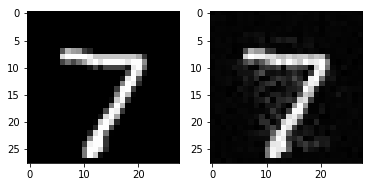

In [18]:
attack = OPT_attack_sign_SGD(amodel)
adv_sign, dist_sign = attack(x.cuda(), y.cuda(), seed=seed)
plot_adv(x, adv_sign)

### TARGETED

Targeted attack - Source: 7 and Target: 6 Seed: 100
Searching for the initial direction on 100 samples: 
--------> Found distortion 5.5378
--------> Found distortion 4.9971


/home/simranjit/blackbox/attackbox-master/models.py:26: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True) # ?? not supported by latest pytorch


==========> Found best distortion 4.9971 in 2.1569 seconds using 1239 queries
Iteration  10 distortion 4.7219 num_queries 2018
Iteration  20 distortion 4.5302 num_queries 4085
Iteration  30 distortion 4.3263 num_queries 6183
Iteration  40 distortion 4.1747 num_queries 8196
Iteration  50 distortion 4.0631 num_queries 10223
Iteration  60 distortion 3.9492 num_queries 12250
Iteration  70 distortion 3.8369 num_queries 14263
Iteration  80 distortion 3.7395 num_queries 16289
Iteration  90 distortion 3.6717 num_queries 18242
Iteration 100 distortion 3.6183 num_queries 20286
Iteration 110 distortion 3.5580 num_queries 22284
Iteration 120 distortion 3.4873 num_queries 24329
Iteration 130 distortion 3.4353 num_queries 26386
Iteration 140 distortion 3.4047 num_queries 28394
Iteration 150 distortion 3.3728 num_queries 30386
Iteration 160 distortion 3.3394 num_queries 32365
Iteration 170 distortion 3.2951 num_queries 34379
Iteration 180 distortion 3.2535 num_queries 36288
Iteration 190 distortion 3

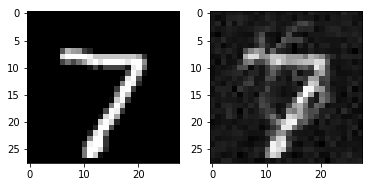

In [10]:
attack = OPT_attack(amodel, train_dataset=train_dataset)
adv, dist = attack(x.cuda(), y.cuda(), target=target*torch.ones(1, dtype=torch.long).cuda(), seed=seed)
plot_adv(x, adv)

Targeted attack - Source: 7 and Target: 6
Searching for the initial direction on 100 samples: 
--------> Found distortion 5.5378
--------> Found distortion 4.9971


/home/simranjit/blackbox/attackbox-master/models.py:26: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True) # ?? not supported by latest pytorch


==========> Found best distortion 4.9971 in 2.0930 seconds using 1239 queries
Iteration   1 distortion 4.9200 num_queries 1503
Iteration   6 distortion 4.0416 num_queries 3040
Iteration  11 distortion 3.6836 num_queries 4400
Iteration  16 distortion 3.4610 num_queries 5608
Iteration  21 distortion 3.2568 num_queries 6839
Iteration  26 distortion 3.1678 num_queries 8058
Iteration  31 distortion 3.0981 num_queries 9240
Iteration  36 distortion 3.0394 num_queries 10431
Iteration  41 distortion 3.0133 num_queries 11602
Iteration  46 distortion 2.9648 num_queries 12781
Iteration  51 distortion 2.9233 num_queries 13960
Iteration  56 distortion 2.8937 num_queries 15129
Iteration  61 distortion 2.8675 num_queries 16298
Iteration  66 distortion 2.8552 num_queries 17497
Success: stopping threshold reached

Adversarial Example Found Successfully: distortion 2.8540 target 6 queries 17957 LS queries 3118 
Time: 28.2612 seconds


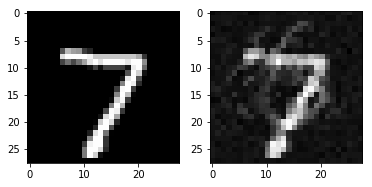

In [11]:
attack = OPT_attack_sign_SGD(amodel, train_dataset=train_dataset)
adv, dist = attack(x.cuda(), y.cuda(), target=target*torch.ones(1, dtype=torch.long).cuda(), seed=seed)
plot_adv(x, adv)

Targeted attack - Source: 7 and Target: 6
Searching for the initial direction on 100 samples: 
--------> Found distortion 5.5378
--------> Found distortion 4.9971


/home/simranjit/blackbox/attackbox-master/models.py:26: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True) # ?? not supported by latest pytorch


==========> Found best distortion 4.9971 in 2.0928 seconds using 1239 queries
Iteration   1 distortion 4.9364 num_queries 2095
Iteration   6 distortion 4.1384 num_queries 3356
Iteration  11 distortion 3.8029 num_queries 4661
Iteration  16 distortion 3.5613 num_queries 6216
Iteration  21 distortion 3.3604 num_queries 7800
Iteration  26 distortion 3.2363 num_queries 8962
Iteration  31 distortion 3.1511 num_queries 10155
Iteration  36 distortion 3.0477 num_queries 11375
Iteration  41 distortion 2.9432 num_queries 12612
Iteration  46 distortion 2.8822 num_queries 13802
Iteration  51 distortion 2.8450 num_queries 14989
Success: stopping threshold reached

Adversarial Example Found Successfully: distortion 2.8349 target 6 queries 15954 LS queries 3715 
Time: 23.5662 seconds


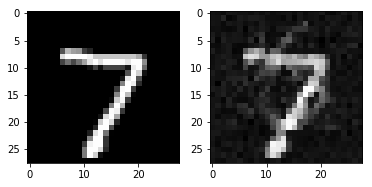

In [12]:
attack = OPT_attack_sign_SGD(amodel, train_dataset=train_dataset)
adv, dist = attack(x.cuda(), y.cuda(), target=target*torch.ones(1, dtype=torch.long).cuda(), seed=seed,
                  svm=True)
plot_adv(x, adv)